### 일원 분산분석 (ANOVA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm
import os

#### 세 반의 성적 데이터가 있다. 서로 의미있는 차이가 있는지 검정하여라.

SciPy를 사용해서 ANOVA를 실행해 본다.

In [2]:
x1 = np.array([82,93,61,74,69,70,53,62])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87,98,77])

In [3]:
res=st.f_oneway(x1,x2,x3)
print("검정통계량  : %f " % res[0] )
print("p-value   : %f " % res[1] )

검정통계량  : 0.974502 
p-value   : 0.393806 


조금 다른 방법으로 다시 해 본다.

In [4]:
y = np.concatenate([x1,x2,x3])
labels = np.repeat(['A','B','C'],[x1.size,x2.size,x3.size])
my_data = pd.DataFrame({'Y':y,'Treat':labels})
my_data

,Y,Treat
0,82,A
1,93,A
2,61,A
3,74,A
4,69,A
5,70,A
6,53,A
7,62,A
8,71,B
9,62,B


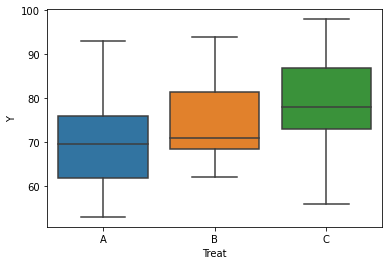

In [5]:
sns.boxplot(x="Treat", y="Y", data=my_data)
plt.show()

In [6]:
my_model = smf.ols('Y ~ Treat', data = my_data)
my_model = my_model.fit()
sm.stats.anova_lm(my_model)

,df,sum_sq,mean_sq,F,PR(>F)
Treat,2.0,306.404762,153.202381,0.974502,0.393806
Residual,21.0,3301.428571,157.210884,NaN,NaN
